## EDA Step 1 — Load Merged Dataset & Inspect Structure

We start by loading the final cleaned merged dataset (2000–2020).  
This dataset contains both **health** and **infrastructure** indicators.  
We will inspect its structure to ensure variables are correctly formatted.


In [4]:
import pandas as pd

df = pd.read_csv("../data/processed/merged_final_clean.csv")

print("Shape:", df.shape)
df.head()


Shape: (4725, 15)


,country,iso_code,year,life_expectancy,child_mortality_rate,infant_mortality_rate,ncd_mortality,obesity_rate,water_access_total,water_inadequate_total,clean_cooking_access,electricity_gen_per_capita,renewables_share,energy_use_per_capita,disaster_deaths
0,Afghanistan,AFG,2000,55.00,13.17,110.1,43.2,3.69,27.441857,72.558144,6.20,23.844612,64.583336,262.68048,447.5
1,Afghanistan,AFG,2001,55.51,12.74,107.0,43.5,4.01,27.473580,72.526421,7.10,34.016453,72.463770,179.89190,447.5
2,Afghanistan,AFG,2002,56.23,12.31,103.8,43.1,4.34,29.674863,70.325139,8.30,33.211520,78.873245,155.69543,447.5
3,Afghanistan,AFG,2003,57.17,11.87,100.6,42.5,4.70,31.875590,68.124410,9.35,40.029820,69.230770,174.55792,447.5
4,Afghanistan,AFG,2004,57.81,11.42,97.2,42.3,5.08,34.094431,65.905569,10.80,33.530476,70.886080,157.75752,447.5


## Summary Statistics

We now view basic statistical properties of each column.
This helps identify scales, ranges, and any unusual values that may affect visualizations.


In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
year,4725.0,2010.000000,6.055942,2000.00,2005.000000,2010.000000,2015.000000,2020.000000
life_expectancy,4725.0,70.671162,8.771508,14.67,65.310000,72.490000,77.130000,86.150000
child_mortality_rate,4242.0,3.805922,4.185341,0.16,0.880000,2.075000,5.382500,47.890000
infant_mortality_rate,4221.0,27.475551,25.693541,1.50,7.600000,17.600000,41.700000,234.900000
ncd_mortality,3906.0,21.248907,7.440532,7.00,15.625000,21.100000,25.675000,45.300000
obesity_rate,4200.0,19.036236,13.490865,0.28,8.155000,18.070000,25.425000,74.980000
water_access_total,4683.0,57.544357,44.572054,0.00,0.000000,84.404490,98.684881,100.000007
water_inadequate_total,4683.0,13.525789,17.905453,0.00,0.773737,4.897440,19.218524,81.317697
clean_cooking_access,4032.0,63.559474,39.270337,0.00,22.100000,83.400000,100.000000,100.000000
electricity_gen_per_capita,4515.0,3758.779796,5141.449663,0.00,493.307085,2131.705800,5182.995750,56048.727000


## Missing Values Overview

We evaluate missing values after cleaning to ensure the dataset is suitable for EDA.


In [6]:
missing = df.isna().sum().to_frame("Missing_Count")
missing["Missing_%"] = (missing["Missing_Count"] / len(df) * 100).round(2)
missing.sort_values("Missing_%", ascending=False)


,Missing_Count,Missing_%
ncd_mortality,819,17.33
clean_cooking_access,693,14.67
obesity_rate,525,11.11
infant_mortality_rate,504,10.67
child_mortality_rate,483,10.22
disaster_deaths,294,6.22
renewables_share,231,4.89
electricity_gen_per_capita,210,4.44
energy_use_per_capita,168,3.56
water_inadequate_total,42,0.89


## EDA Step 2 — Global Trend Visualizations (2000–2020)

In this section, we visualize the global evolution of key health and infrastructure indicators.  
For each variable, we compute the **annual global average** and plot the trend.  
This highlights macro-level improvements, stagnation, or reversals relevant to the Progress Paradox story.


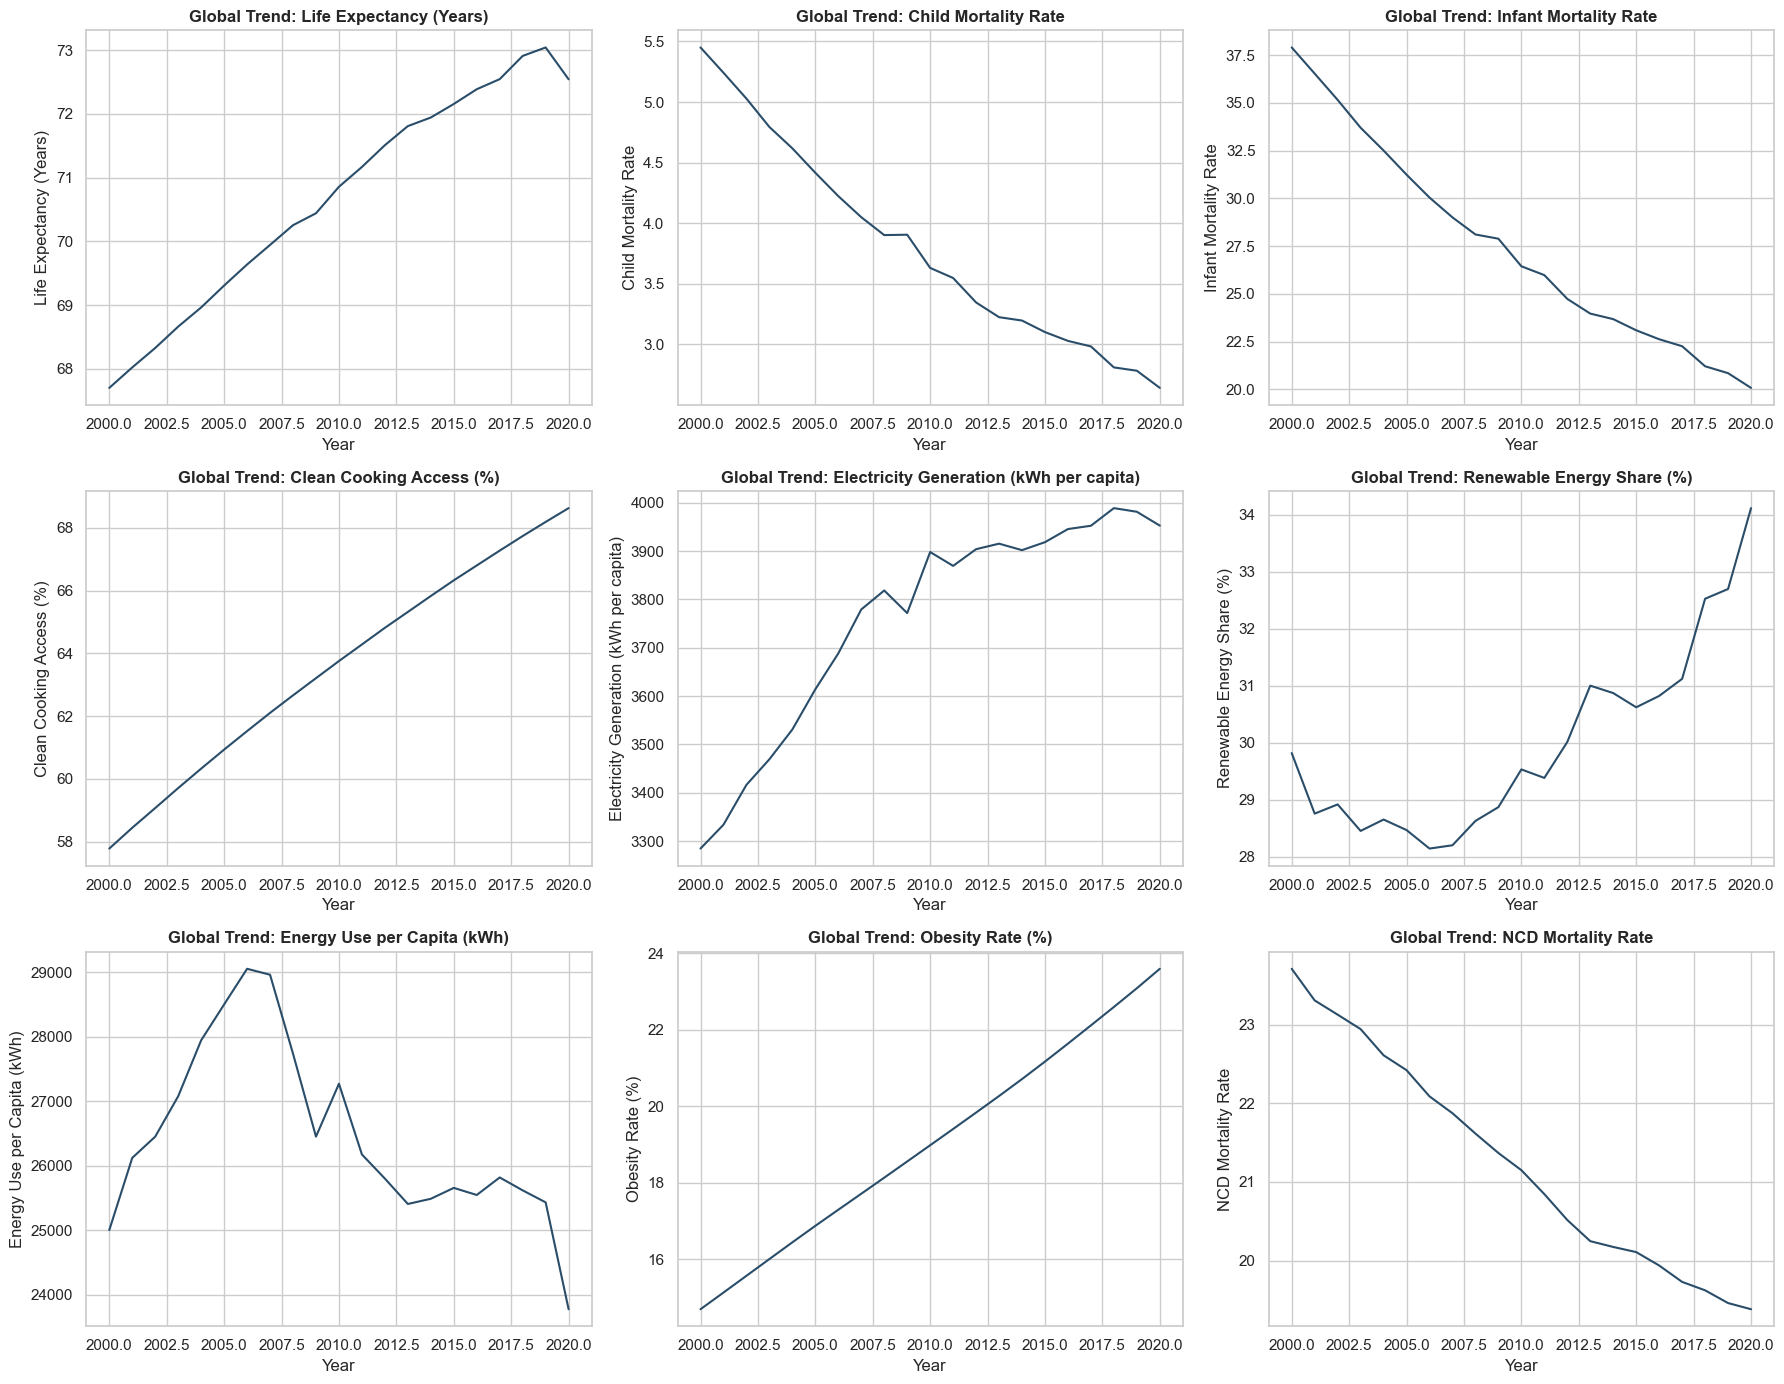

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use a clean plotting style
sns.set_theme(style="whitegrid")

df = pd.read_csv("../data/processed/merged_final_clean.csv")

# Variables to plot
variables = {
    "life_expectancy": "Life Expectancy (Years)",
    "child_mortality_rate": "Child Mortality Rate",
    "infant_mortality_rate": "Infant Mortality Rate",
    "clean_cooking_access": "Clean Cooking Access (%)",
    "electricity_gen_per_capita": "Electricity Generation (kWh per capita)",
    "renewables_share": "Renewable Energy Share (%)",
    "energy_use_per_capita": "Energy Use per Capita (kWh)",
    "obesity_rate": "Obesity Rate (%)",
    "ncd_mortality": "NCD Mortality Rate"
}

# Compute global averages
global_trends = df.groupby("year")[list(variables.keys())].mean().reset_index()

# Plot each variable
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 14))
axes = axes.flatten()

for ax, (var, label) in zip(axes, variables.items()):
    sns.lineplot(data=global_trends, x="year", y=var, ax=ax, color="#2A4D69")
    ax.set_title(f"Global Trend: {label}", fontsize=12, weight="bold")
    ax.set_xlabel("Year")
    ax.set_ylabel(label)

plt.tight_layout()
plt.show()


## EDA Step 3 — Region-Level Trends (2000–2020)

To understand global inequality and the "Progress Paradox", we analyze how 
key indicators evolve **by world region**. This highlights whether some parts 
of the world progress faster, while others lag behind, despite global averages improving.

We will produce region-level line charts for:
- Life Expectancy
- Child & Infant Mortality
- Clean Cooking Access
- Electricity Generation
- Renewable Energy Share
- Obesity Rate
- NCD Mortality


In [14]:
# --- Step 1: Add regions to the dataset ---

region_map = {
    # Africa
    "Algeria":"Africa", "Angola":"Africa", "Benin":"Africa", "Botswana":"Africa",
    "Burkina Faso":"Africa", "Burundi":"Africa", "Cameroon":"Africa", "Cape Verde":"Africa",
    "Central African Republic":"Africa", "Chad":"Africa", "Comoros":"Africa", "Congo":"Africa",
    "Democratic Republic of Congo":"Africa", "Djibouti":"Africa", "Egypt":"Africa",
    "Equatorial Guinea":"Africa", "Eritrea":"Africa", "Eswatini":"Africa", "Ethiopia":"Africa",
    "Gabon":"Africa", "Gambia":"Africa", "Ghana":"Africa", "Guinea":"Africa",
    "Guinea-Bissau":"Africa", "Kenya":"Africa", "Lesotho":"Africa", "Liberia":"Africa",
    "Libya":"Africa", "Madagascar":"Africa", "Malawi":"Africa", "Mali":"Africa",
    "Mauritania":"Africa", "Mauritius":"Africa", "Morocco":"Africa", "Mozambique":"Africa",
    "Namibia":"Africa", "Niger":"Africa", "Nigeria":"Africa", "Rwanda":"Africa",
    "Sao Tome and Principe":"Africa", "Senegal":"Africa", "Seychelles":"Africa",
    "Sierra Leone":"Africa", "Somalia":"Africa", "South Africa":"Africa",
    "South Sudan":"Africa", "Sudan":"Africa", "Tanzania":"Africa", "Togo":"Africa",
    "Tunisia":"Africa", "Uganda":"Africa", "Zambia":"Africa", "Zimbabwe":"Africa",

    # Asia
    "China":"Asia", "India":"Asia", "Japan":"Asia", "Pakistan":"Asia", "Bangladesh":"Asia",
    "Sri Lanka":"Asia", "Nepal":"Asia", "Bhutan":"Asia", "Maldives":"Asia",
    "Thailand":"Asia", "Vietnam":"Asia", "Cambodia":"Asia", "Laos":"Asia", "Myanmar":"Asia",
    "Indonesia":"Asia", "Philippines":"Asia", "Malaysia":"Asia", "Singapore":"Asia",
    "South Korea":"Asia", "North Korea":"Asia", "Mongolia":"Asia",

    # Europe
    "France":"Europe", "Germany":"Europe", "Italy":"Europe", "Spain":"Europe",
    "United Kingdom":"Europe", "Portugal":"Europe", "Netherlands":"Europe",
    "Belgium":"Europe", "Greece":"Europe", "Sweden":"Europe", "Norway":"Europe",
    "Finland":"Europe", "Denmark":"Europe", "Austria":"Europe", "Switzerland":"Europe",
    "Poland":"Europe", "Czech Republic":"Europe", "Hungary":"Europe",
    "Ireland":"Europe", "Romania":"Europe", "Bulgaria":"Europe",
    "Ukraine":"Europe", "Russia":"Europe",

    # North America
    "United States":"North America", "Canada":"North America", "Mexico":"North America",

    # South America
    "Brazil":"South America", "Argentina":"South America", "Chile":"South America",
    "Colombia":"South America", "Peru":"South America", "Ecuador":"South America",
    "Bolivia":"South America", "Paraguay":"South America", "Uruguay":"South America",

    # Oceania
    "Australia":"Oceania", "New Zealand":"Oceania"
}

# Assign regions
df["region"] = df["country"].map(region_map)
df["region"] = df["region"].fillna("Other")

df["region"].value_counts().head()

region
Other            2415
Africa           1113
Europe            462
Asia              441
South America     189
Name: count, dtype: int64

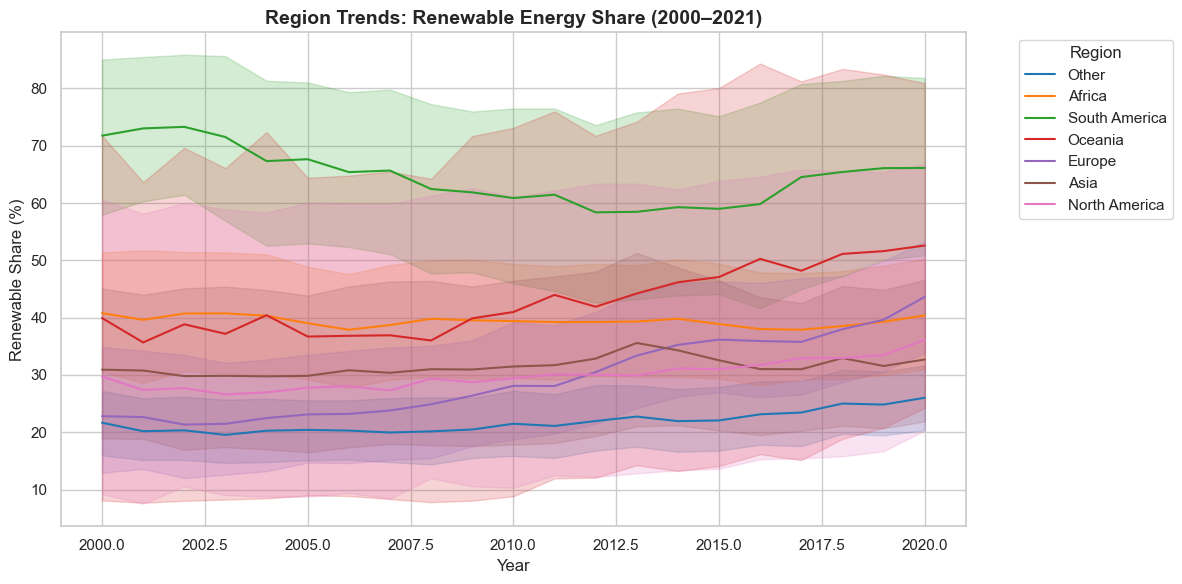

In [15]:

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x="year",
    y="renewables_share",
    hue="region",
    palette="tab10"
)

plt.title("Region Trends: Renewable Energy Share (2000–2021)", fontsize=14, weight="bold")
plt.ylabel("Renewable Share (%)")
plt.xlabel("Year")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


## 4. Correlation Analysis: Health vs Infrastructure

In this section, we explore how infrastructure development relates to health outcomes.
We calculate correlations between variables such as:

- Life expectancy  
- Child & infant mortality  
- NCD mortality  
- Obesity  
- Clean cooking access  
- Electricity generation per capita  
- Renewable energy share  
- Energy use per capita  
- Water access indicators  
- ODA infrastructure funding  

This analysis helps identify which infrastructure dimensions have the strongest associations with health improvements globally.


In [17]:
df.columns.tolist()


['country',
 'iso_code',
 'year',
 'life_expectancy',
 'child_mortality_rate',
 'infant_mortality_rate',
 'ncd_mortality',
 'obesity_rate',
 'water_access_total',
 'water_inadequate_total',
 'clean_cooking_access',
 'electricity_gen_per_capita',
 'renewables_share',
 'energy_use_per_capita',
 'disaster_deaths',
 'region']

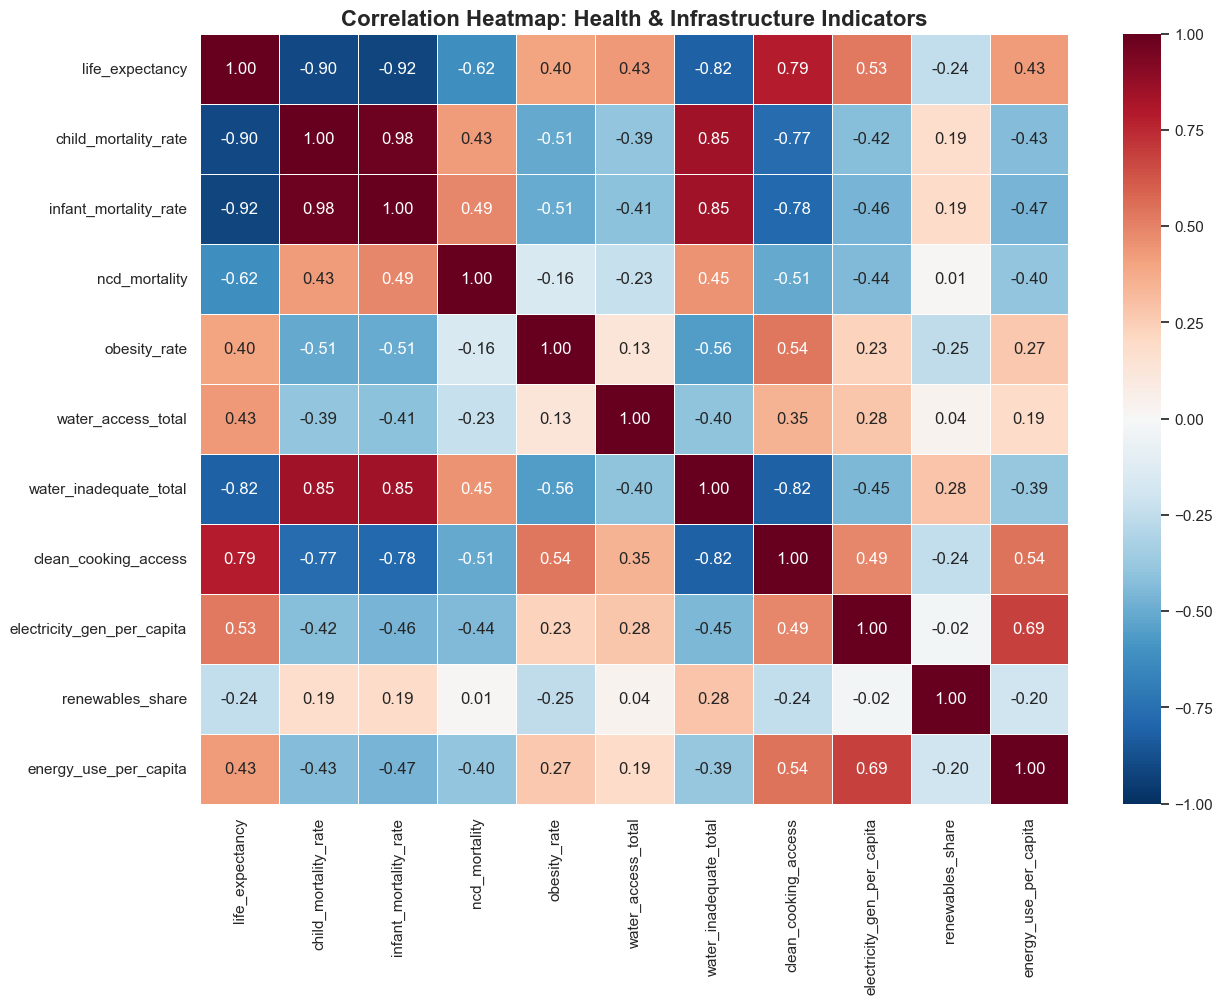

In [18]:
corr_vars = [
    "life_expectancy",
    "child_mortality_rate",
    "infant_mortality_rate",
    "ncd_mortality",
    "obesity_rate",
    "water_access_total",
    "water_inadequate_total",
    "clean_cooking_access",
    "electricity_gen_per_capita",
    "renewables_share",
    "energy_use_per_capita",
    # Optional: include only if needed
    # "disaster_deaths"
]

corr_df = df[corr_vars].corr(method="pearson")

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_df,
    cmap="RdBu_r",
    annot=True,
    fmt=".2f",
    vmin=-1, vmax=1,
    linewidths=0.5
)

plt.title("Correlation Heatmap: Health & Infrastructure Indicators", fontsize=16, weight="bold")
plt.show()

In [20]:
from sklearn.preprocessing import MinMaxScaler


health_features = [
    "life_expectancy", 
    "child_mortality_rate", 
    "infant_mortality_rate",
    "ncd_mortality"
]

infra_features = [
    "electricity_gen_per_capita",
    "clean_cooking_access",
    "renewables_share",
    "energy_use_per_capita",
    "water_access_total"
]

# Make copies for scaling
health_scaled = df[health_features].copy()
infra_scaled = df[infra_features].copy()

# Reverse scale for negative indicators (low value = bad)
reverse_cols = ["child_mortality_rate", "infant_mortality_rate", "ncd_mortality"]
for col in reverse_cols:
    health_scaled[col] = -health_scaled[col]

# Scale 0–1
scaler = MinMaxScaler()
df["health_index"] = scaler.fit_transform(health_scaled).mean(axis=1)
df["infra_index"]  = scaler.fit_transform(infra_scaled).mean(axis=1)

df.head()


,country,iso_code,year,life_expectancy,child_mortality_rate,infant_mortality_rate,ncd_mortality,obesity_rate,water_access_total,water_inadequate_total,clean_cooking_access,electricity_gen_per_capita,renewables_share,energy_use_per_capita,disaster_deaths,region,health_index,infra_index
0,Afghanistan,AFG,2000,55.00,13.17,110.1,43.2,3.69,27.441857,72.558144,6.20,23.844612,64.583336,262.68048,447.5,Other,0.470293,0.196616
1,Afghanistan,AFG,2001,55.51,12.74,107.0,43.5,4.01,27.473580,72.526421,7.10,34.016453,72.463770,179.89190,447.5,Other,0.475692,0.214251
2,Afghanistan,AFG,2002,56.23,12.31,103.8,43.1,4.34,29.674863,70.325139,8.30,33.211520,78.873245,155.69543,447.5,Other,0.486501,0.233862
3,Afghanistan,AFG,2003,57.17,11.87,100.6,42.5,4.70,31.875590,68.124410,9.35,40.029820,69.230770,174.55792,447.5,Other,0.499437,0.221109
4,Afghanistan,AFG,2004,57.81,11.42,97.2,42.3,5.08,34.094431,65.905569,10.80,33.530476,70.886080,157.75752,447.5,Other,0.508980,0.231729


In [22]:
# Replace NaN in bubble-size column
df["energy_use_per_capita_size"] = df["energy_use_per_capita"].fillna(1)


In [35]:
fig = px.scatter(
    df,
    x="infra_index",
    y="health_index",
    animation_frame="year",
    animation_group="country",
    color="region",
    hover_name="country",
    size="energy_use_per_capita_size",
    size_max=60,
    range_x=[0, 1],
    range_y=[0, 1.2],
    title="Infrastructure vs Health Index Over Time (Progress Paradox Visualization)",
    color_discrete_sequence=px.colors.qualitative.Set2,
)

fig.update_layout(
    width=900,
    height=600,
    plot_bgcolor="white",
    paper_bgcolor="white",
    xaxis=dict(showgrid=True, gridcolor="lightgrey"),
    yaxis=dict(showgrid=True, gridcolor="lightgrey")
)

fig.show()


## Global Health Index Map (2000–2021)

This choropleth shows how the composite **Health Index** (life expectancy + child mortality + infant mortality + NCD mortality + obesity + water access metrics) evolves over time across the world.  
The animation helps reveal regional inequalities and improvements over the years.


In [25]:
fig = px.choropleth(
    df,
    locations="iso_code",
    color="health_index",
    hover_name="country",
    animation_frame="year",
    color_continuous_scale="RdYlGn",
    range_color=[df.health_index.min(), df.health_index.max()],
    title="Global Health Index Over Time",
)

fig.update_layout(
    geo=dict(showframe=False, projection_type="natural earth")
)

fig.show()


##  Global Infrastructure Index Map (2000–2021)

The Infrastructure Index combines clean cooking access, electricity generation per capita, renewables share, energy use, and ODA funding.  
This world map illustrates how infrastructure access and quality evolved geographically.


In [27]:
fig = px.choropleth(
    df,
    locations="iso_code",
    color="infra_index",
    hover_name="country",
    animation_frame="year",
    color_continuous_scale="Blues",
    range_color=[df.infra_index.min(), df.infra_index.max()],
    title="Global Infrastructure Index Over Time",
)

fig.update_layout(
    geo=dict(showframe=False, projection_type="natural earth")
)

fig.show()


##  Combined Infographic: Health vs Infrastructure

This infographic summarizes both indices in a static visual form suitable for the final presentation or report.  
It highlights differences between countries and visually reinforces the central paradox of uneven progress.


C:\Users\wpmpo\AppData\Local\Temp\ipykernel_8936\2989509117.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\wpmpo\AppData\Local\Temp\ipykernel_8936\2989509117.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




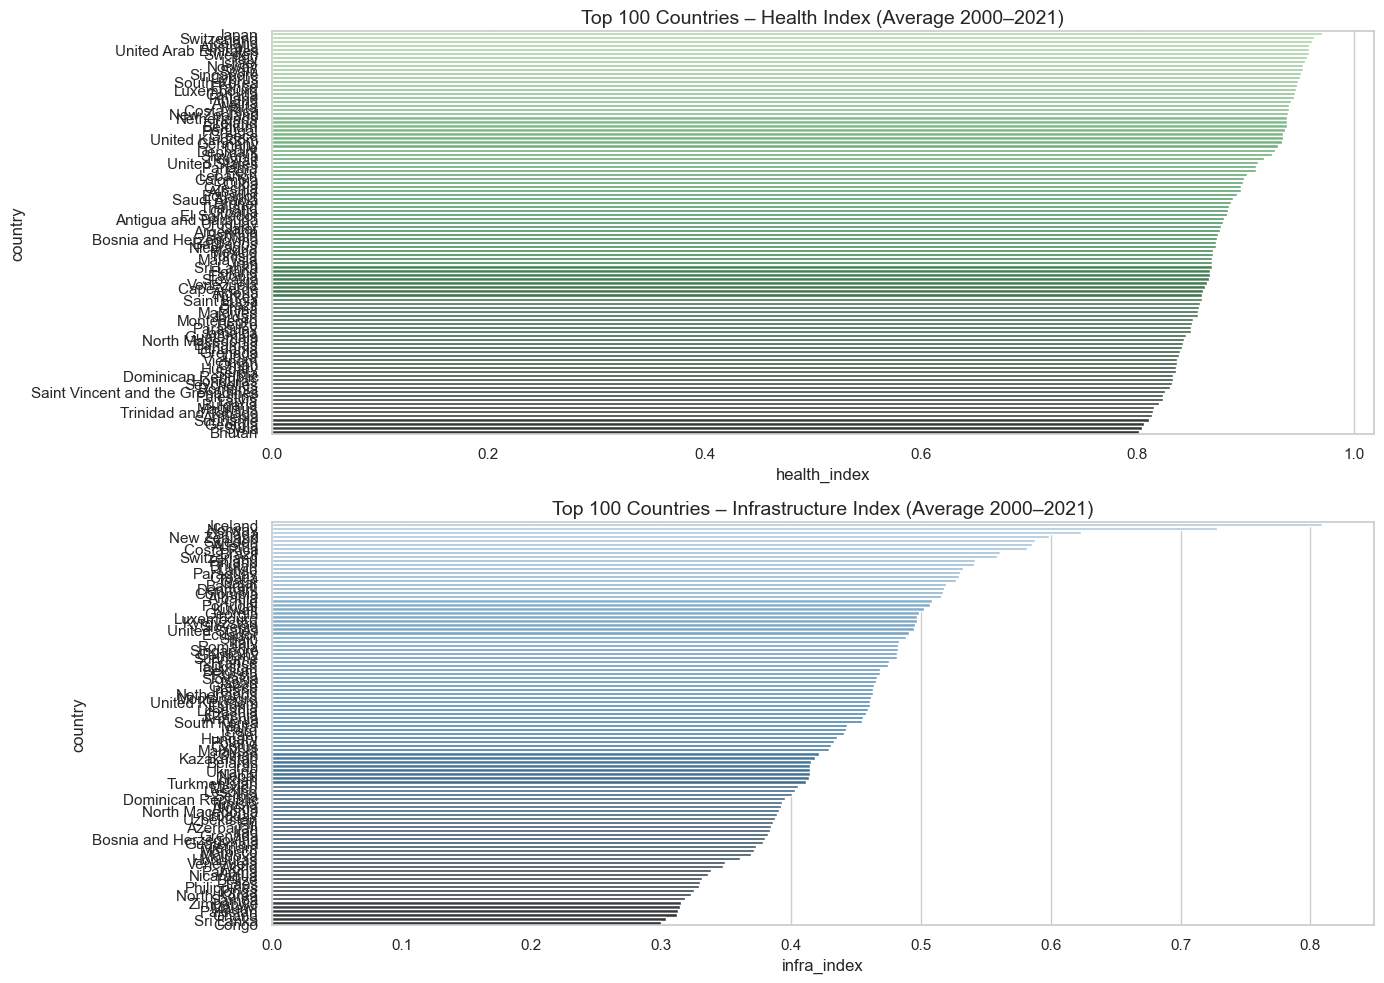

In [29]:
fig, axs = plt.subplots(2, 1, figsize=(14, 10))

sns.barplot(
    data=df.groupby("country")["health_index"].mean().sort_values(ascending=False).head(100).reset_index(),
    x="health_index", y="country", ax=axs[0], palette="Greens_d"
)
axs[0].set_title("Top 100 Countries – Health Index (Average 2000–2021)", fontsize=14)

sns.barplot(
    data=df.groupby("country")["infra_index"].mean().sort_values(ascending=False).head(100).reset_index(),
    x="infra_index", y="country", ax=axs[1], palette="Blues_d"
)
axs[1].set_title("Top 100 Countries – Infrastructure Index (Average 2000–2021)", fontsize=14)

plt.tight_layout()
plt.show()


In [30]:
plt.figure(figsize=(10, 25))
sns.scatterplot(
    data=top100,
    x="health_index",
    y="country",
    hue="region",
    palette="tab10",
    s=70
)
plt.title("Top 100 Countries – Health Index (Dot Plot)")
plt.xlabel("Health Index")
plt.ylabel("")
plt.legend(title="Region")
plt.tight_layout()
plt.show()


NameError: name 'top100' is not defined

<Figure size 1000x2500 with 0 Axes>

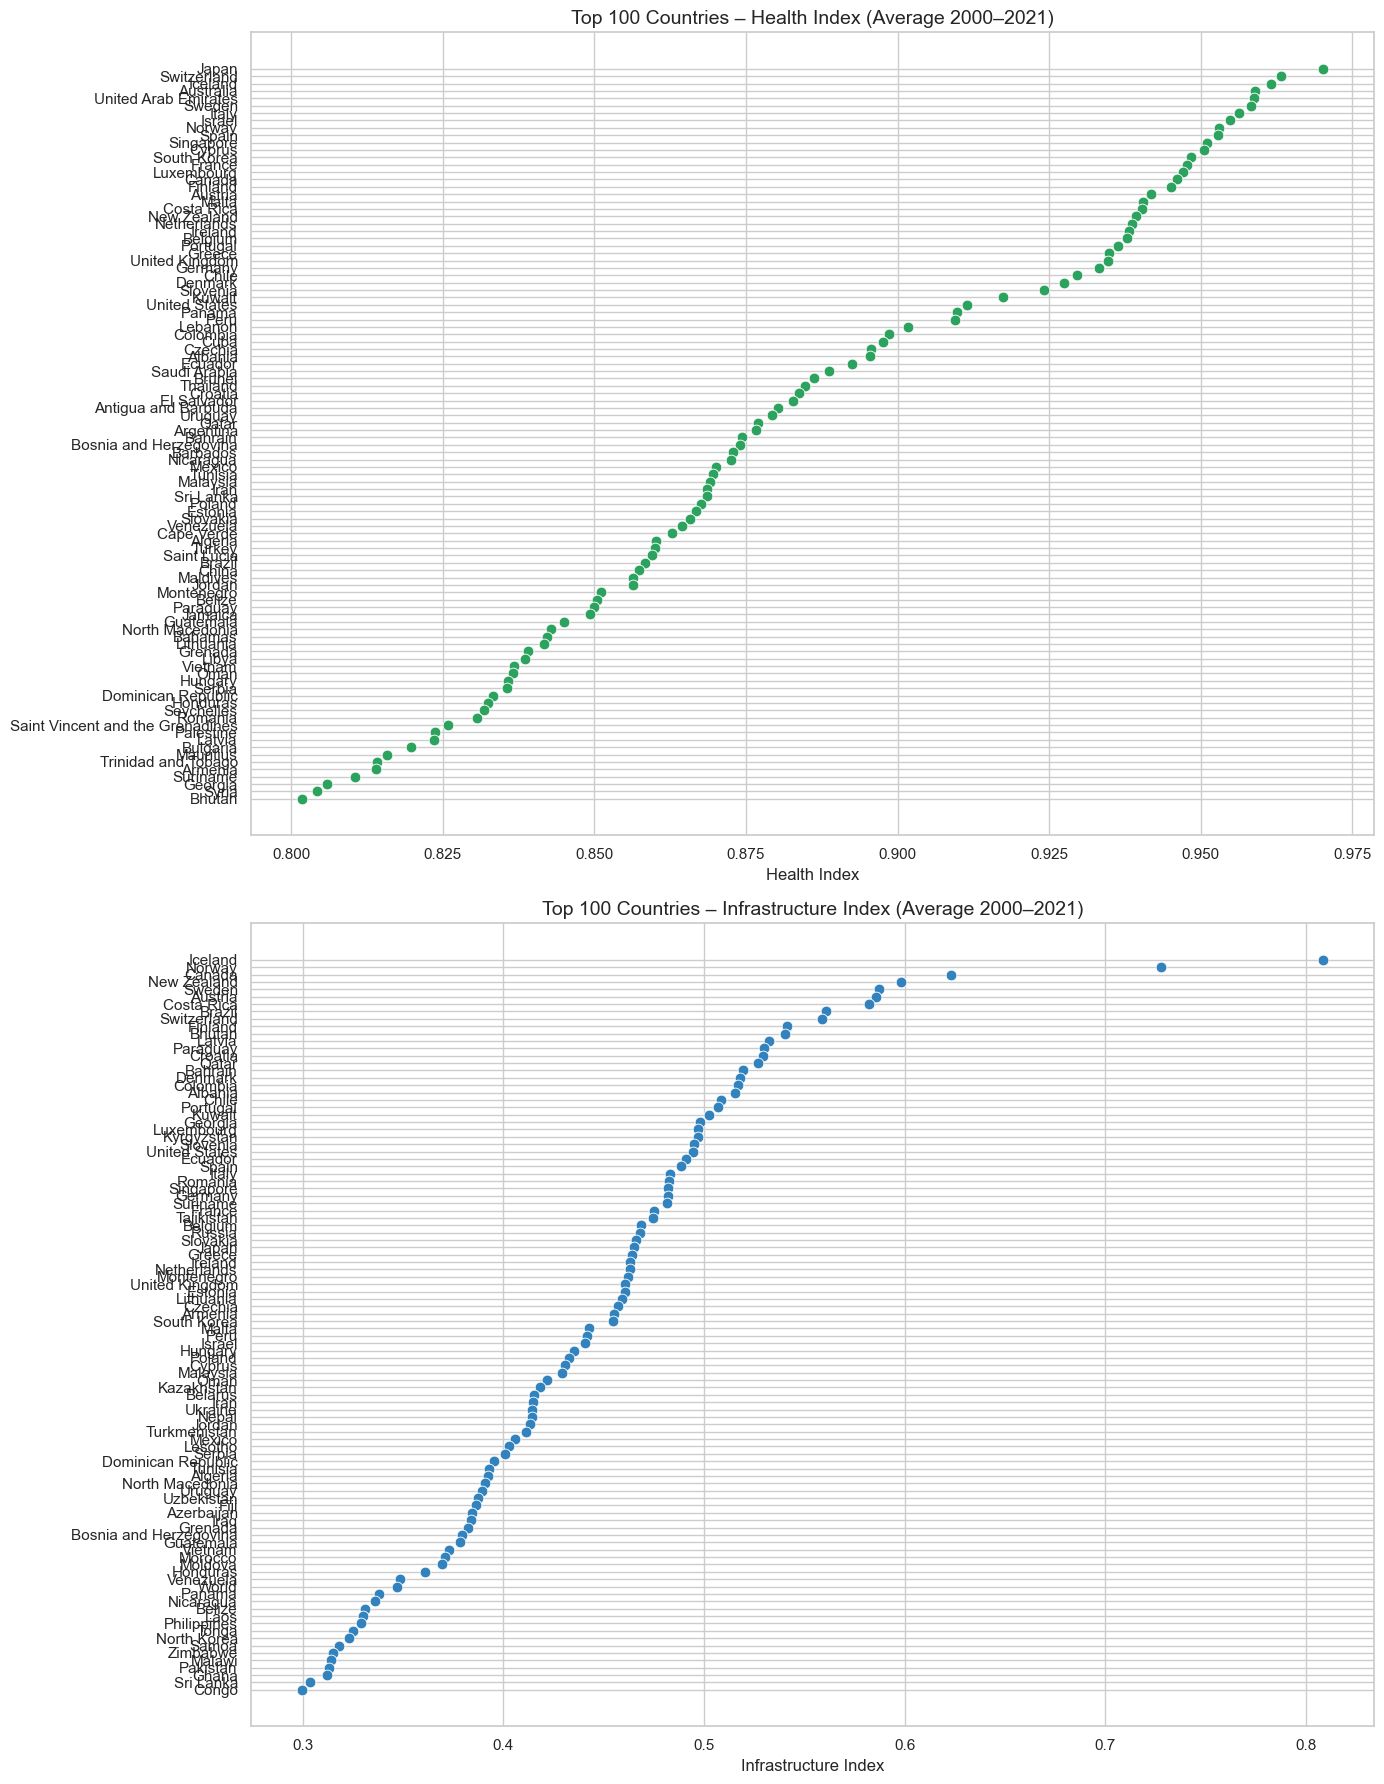

In [31]:
fig, axs = plt.subplots(2, 1, figsize=(14, 18))

# ---------- HEALTH DOT PLOT ----------
health_top100 = (
    df.groupby("country")["health_index"]
    .mean()
    .sort_values(ascending=False)
    .head(100)
    .reset_index()
)

sns.scatterplot(
    data=health_top100,
    x="health_index",
    y="country",
    ax=axs[0],
    color="#2ca25f",
    s=60
)
axs[0].set_title("Top 100 Countries – Health Index (Average 2000–2021)", fontsize=14)
axs[0].set_xlabel("Health Index")
axs[0].set_ylabel("")

# ---------- INFRA DOT PLOT ----------
infra_top100 = (
    df.groupby("country")["infra_index"]
    .mean()
    .sort_values(ascending=False)
    .head(100)
    .reset_index()
)

sns.scatterplot(
    data=infra_top100,
    x="infra_index",
    y="country",
    ax=axs[1],
    color="#3182bd",
    s=60
)
axs[1].set_title("Top 100 Countries – Infrastructure Index (Average 2000–2021)", fontsize=14)
axs[1].set_xlabel("Infrastructure Index")
axs[1].set_ylabel("")

plt.tight_layout()
plt.show()


C:\Users\wpmpo\AppData\Local\Temp\ipykernel_8936\1509811145.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\wpmpo\AppData\Local\Temp\ipykernel_8936\1509811145.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




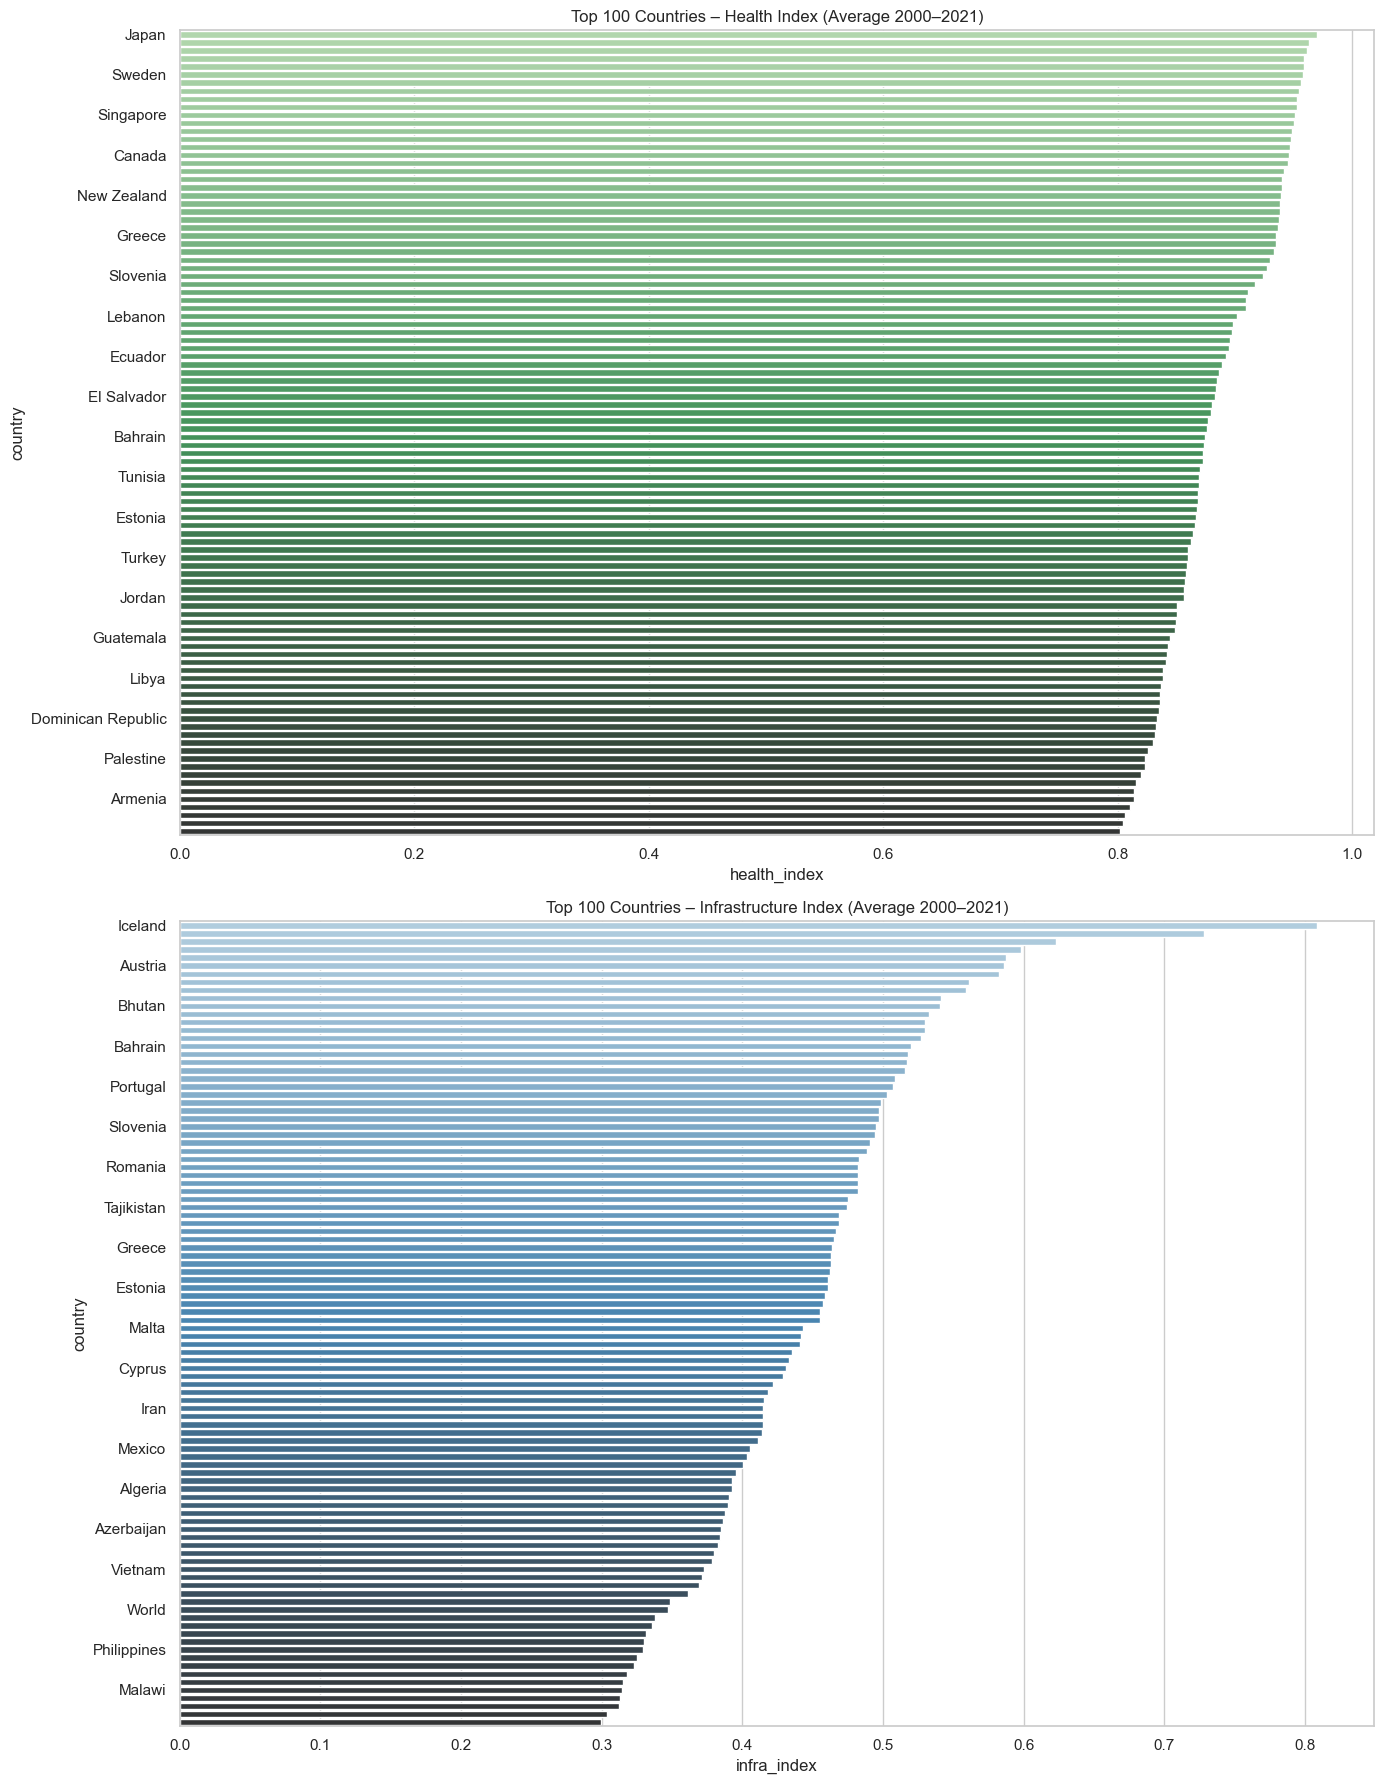

In [32]:
fig, axs = plt.subplots(2, 1, figsize=(14, 18))

# ----- HEALTH -----
health = (
    df.groupby("country")["health_index"]
    .mean()
    .sort_values(ascending=False)
    .head(100)
    .reset_index()
)

sns.barplot(data=health, x="health_index", y="country", ax=axs[0], palette="Greens_d")
axs[0].set_title("Top 100 Countries – Health Index (Average 2000–2021)")

# Show only every 5th label
axs[0].set_yticks(axs[0].get_yticks()[::5])
axs[0].set_yticklabels(health["country"].iloc[::5])

# ----- INFRA -----
infra = (
    df.groupby("country")["infra_index"]
    .mean()
    .sort_values(ascending=False)
    .head(100)
    .reset_index()
)

sns.barplot(data=infra, x="infra_index", y="country", ax=axs[1], palette="Blues_d")
axs[1].set_title("Top 100 Countries – Infrastructure Index (Average 2000–2021)")

# Only every 5th label
axs[1].set_yticks(axs[1].get_yticks()[::5])
axs[1].set_yticklabels(infra["country"].iloc[::5])

plt.tight_layout()
plt.show()


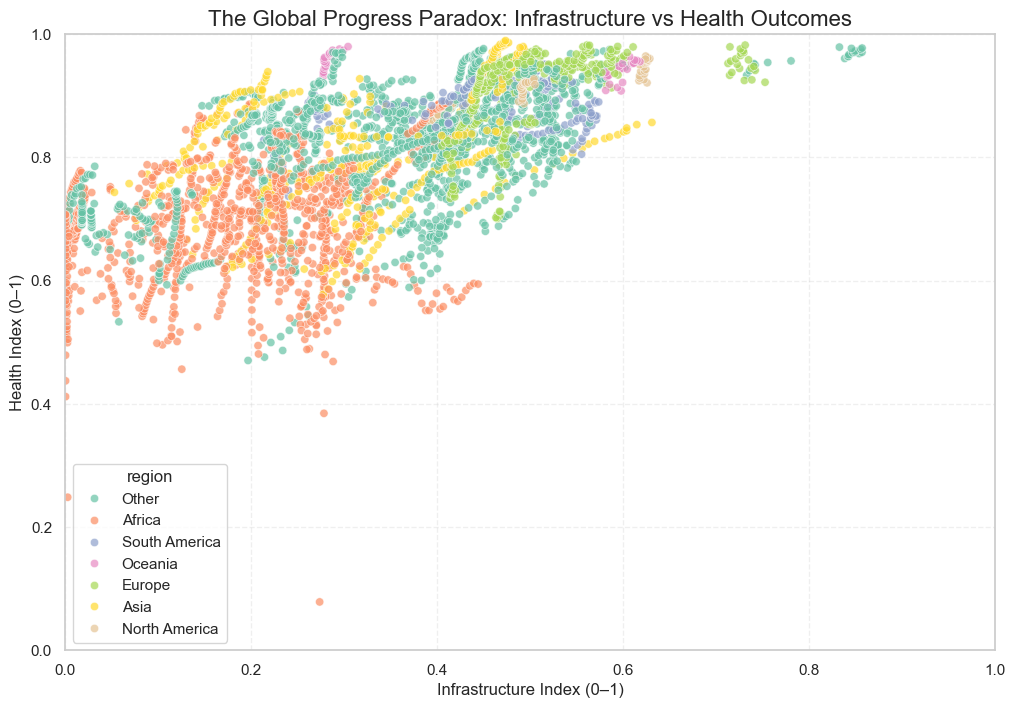

In [ ]:
df_avg = df.groupby("country", as_index=False)[["infra_index", "health_index"]].mean()

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_avg,
    x="infra_index",
    y="health_index",
    hue="region",
    palette="Set2",
    s=80
)
plt.title("Infrastructure vs Health Outcomes (Averaged by Country, 2000–2021)")
plt.xlabel("Infrastructure Index (0–1)")
plt.ylabel("Health Index (0–1)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


In [40]:
pip install ffmpeg-python


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
